# Instructions:
To complete the following task using Python, please download an
Integrated Development Environment (IDE) of your choice. Ensure that your solution
includes both the written code (input) and its corresponding output. Once completed,
upload your solution in PDF format or any other format you prefer. The questions
are worth 50 points each.

# Question 2: Predicting Building Energy Efficiency
## Objective:
Apply regression techniques using Scikit-learn to analyze and predict the energy efficiency
of buildings, focusing on heating and cooling load requirements. This involves the use of
various regression models, feature engineering, and model evaluation.
## Dataset:
The dataset for this assignment, Energy Efficiency Dataset, can be found at the UCI
Machine Learning Repository. It includes architectural features and energy efficiency
metrics of buildings. The dataset columns are renamed for clarity as follows:
```
column_names = {'X1':'Relative_Compactness', 'X2': 'Surface_Area',
'X3': 'Wall_Area', 'X4': 'Roof_Area',
'X5': 'Overall_Height', 'X6': 'Orientation',
'X7': 'Glazing_Area', 'X8': 'Glazing_Area_Distribution',
'Y1': 'Cooling_Load', 'Y2': 'Cooling_Load'}
```

All of the imports

In [170]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import resample
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import root_mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

## Task 1
Data Preprocessing:
- Perform exploratory data analysis (EDA) after loading the dataset.
- Conduct feature engineering if necessary.


In [89]:
# fetch dataset 
energy_efficiency = fetch_ucirepo(id=242) 
  
# data (as pandas dataframes) 
X1 = energy_efficiency.data.features 
y1 = energy_efficiency.data.targets 
  
# metadata 
print("Source data metadata:")
print(energy_efficiency.metadata) 
  
# variable information
print("")
print("Source data variable information:")
print(energy_efficiency.variables)

# X descriptive statistics 
print("")
print("Feature descriptive statistics:")
print(X1.describe())

print("")
print("Target descriptive statistics:")
print(y1.describe())


Source data metadata:
{'uci_id': 242, 'name': 'Energy efficiency', 'repository_url': 'https://archive.ics.uci.edu/dataset/242/energy+efficiency', 'data_url': 'https://archive.ics.uci.edu/static/public/242/data.csv', 'abstract': 'This study looked into assessing the heating load and cooling load requirements of buildings (that is, energy efficiency) as a function of building parameters.', 'area': 'Computer Science', 'tasks': ['Classification', 'Regression'], 'characteristics': ['Multivariate'], 'num_instances': 768, 'num_features': 8, 'feature_types': ['Integer', 'Real'], 'demographics': [], 'target_col': ['Y1', 'Y2'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 2012, 'last_updated': 'Sat Jan 27 2024', 'dataset_doi': '10.24432/C51307', 'creators': ['Athanasios Tsanas', 'Angeliki Xifara'], 'intro_paper': {'title': 'Accurate quantitative estimation of energy performance of residential buildings using statistical machine learnin

In [90]:
column_names = {'X1':'Relative_Compactness', 'X2': 'Surface_Area',
'X3': 'Wall_Area', 'X4': 'Roof_Area',
'X5': 'Overall_Height', 'X6': 'Orientation',
'X7': 'Glazing_Area', 'X8': 'Glazing_Area_Distribution',
'Y1': 'Heating_Load', 'Y2': 'Cooling_Load'}
print("")
print("Renaming the columns per:")
print(column_names)
X = X1.rename(columns=column_names)
y = y1.rename(columns=column_names)
print("")
print("New X:")
print(X)
print("")
print("New y:")
print(y)


Renaming the columns per:
{'X1': 'Relative_Compactness', 'X2': 'Surface_Area', 'X3': 'Wall_Area', 'X4': 'Roof_Area', 'X5': 'Overall_Height', 'X6': 'Orientation', 'X7': 'Glazing_Area', 'X8': 'Glazing_Area_Distribution', 'Y1': 'Heating_Load', 'Y2': 'Cooling_Load'}

New X:
     Relative_Compactness  Surface_Area  Wall_Area  Roof_Area  Overall_Height  \
0                    0.98         514.5      294.0     110.25             7.0   
1                    0.98         514.5      294.0     110.25             7.0   
2                    0.98         514.5      294.0     110.25             7.0   
3                    0.98         514.5      294.0     110.25             7.0   
4                    0.90         563.5      318.5     122.50             7.0   
..                    ...           ...        ...        ...             ...   
763                  0.64         784.0      343.0     220.50             3.5   
764                  0.62         808.5      367.5     220.50             3.5   

I did not see any need for feature engineering. The data looks good, there are no missing values, and I cannot see any new calculated values. I did consider vectorizing several of the columns but felt that it was not necessary.

## Task 2
Model Development:
- Implement various regression models (Linear Regression, Ridge, Lasso, and
Elastic Net).
- Implement Random Forest Regression (Bonus Question - 5pts)
- Perform hyperparameter tuning for optimization.

Before we start, lets split the data into Test and Training data.

In [91]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=64)

print('X_train shape:', X_train.shape)
print('y_train shape:', y_train.shape)
print('X_test shape:', X_test.shape)
print('y_test shape:', y_test.shape)

X_train shape: (614, 8)
y_train shape: (614, 2)
X_test shape: (154, 8)
y_test shape: (154, 2)


### Task 2.1.1

Linear Regression Heating

Perform a hyperparameter search.

In [151]:
param_grid = {'fit_intercept': [True, False]}
grid = GridSearchCV(LinearRegression(), param_grid, cv=7)
grid.fit(X_train, y_train['Heating_Load'])
grid.best_params_

True


In [152]:
modelLRHeat = LinearRegression(fit_intercept=grid.best_params_['fit_intercept'])
modelLRHeat.fit(X_train, y_train['Heating_Load'])
y_train['LR_Heating_Pred'] = modelLRHeat.predict(X_train)
y_test['LR_Heating_Pred'] = modelLRHeat.predict(X_test)

print("")
print("Linear regression heating intercept:")
print(modelLRHeat.intercept_)
print("Linear regression heating coefficients:")
print(modelLRHeat.coef_)


Linear regression heating intercept:
89.71793630044306
Linear regression heating coefficients:
[-6.74615065e+01  2.70325996e+12 -2.70325996e+12 -5.40651992e+12
  4.16039296e+00 -3.43839226e-02  2.03578843e+01  1.96642418e-01]


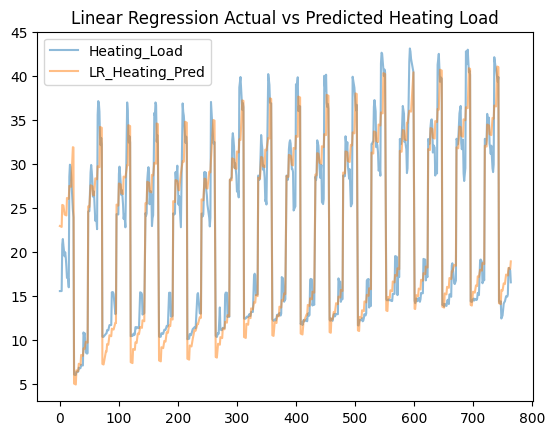

In [94]:
x = y_train[['Heating_Load', 'LR_Heating_Pred']].sort_index().plot(alpha=0.5, title="Linear Regression Actual vs Predicted Heating Load")

In [95]:
paramsLRHeat = pd.Series(modelLRHeat.coef_, index=X_train.columns)
paramsLRHeat

Relative_Compactness        -6.746151e+01
Surface_Area                 2.703260e+12
Wall_Area                   -2.703260e+12
Roof_Area                   -5.406520e+12
Overall_Height               4.160393e+00
Orientation                 -3.438392e-02
Glazing_Area                 2.035788e+01
Glazing_Area_Distribution    1.966424e-01
dtype: float64

In [96]:
np.random.seed(1)
errLRHeat = np.std([modelLRHeat.fit(*resample(X_train, y_train['Heating_Load'])).coef_
              for i in range(1000)], 0)

In [97]:
print(pd.DataFrame({'effect': paramsLRHeat.round(0),
                    'error': errLRHeat.round(0)}))

                                 effect         error
Relative_Compactness      -6.700000e+01  7.000000e+00
Surface_Area               2.703260e+12  1.038923e+12
Wall_Area                 -2.703260e+12  1.038923e+12
Roof_Area                 -5.406520e+12  2.077845e+12
Overall_Height             4.000000e+00  0.000000e+00
Orientation               -0.000000e+00  0.000000e+00
Glazing_Area               2.000000e+01  1.000000e+00
Glazing_Area_Distribution  0.000000e+00  0.000000e+00


{Summarize}

### Task 2.1.2

Linear Regression Cooling

Perform a hyperparameter search.

In [153]:
param_grid = {'fit_intercept': [True, False]}
grid = GridSearchCV(LinearRegression(), param_grid, cv=7)
grid.fit(X_train, y_train['Cooling_Load'])
grid.best_params_

{'fit_intercept': True}

In [154]:
modelLRCool = LinearRegression(fit_intercept=grid.best_params_['fit_intercept'])
modelLRCool.fit(X_train, y_train['Cooling_Load'])
y_train['LR_Cooling_Pred'] = modelLRCool.predict(X_train)
y_test['LR_Cooling_Pred'] = modelLRCool.predict(X_test)

print("")
print("Linear regression cooling intercept:")
print(modelLRCool.intercept_)
print("Linear regression cooling coefficients:")
print(modelLRCool.coef_)


Linear regression cooling intercept:
99.36310688741688
Linear regression cooling coefficients:
[-7.22275652e+01  2.17833249e+12 -2.17833249e+12 -4.35666497e+12
  4.44973868e+00  1.04135174e-01  1.51861664e+01  4.93585819e-02]


<Axes: title={'center': 'Linear Regression Actual vs Predicted Cooling Load'}>

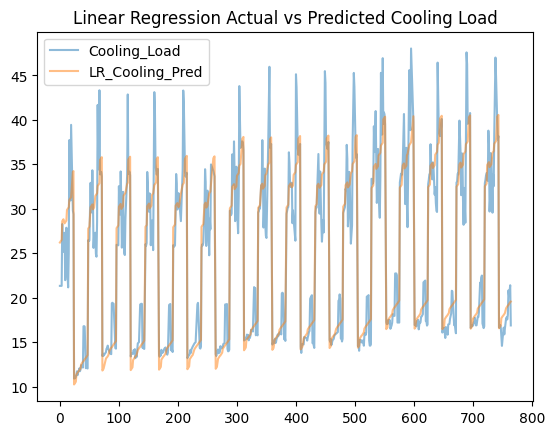

In [100]:
y_train[['Cooling_Load', 'LR_Cooling_Pred']].sort_index().plot(alpha=0.5, title="Linear Regression Actual vs Predicted Cooling Load")

In [101]:
paramsLRCool = pd.Series(modelLRCool.coef_, index=X_train.columns)
paramsLRCool

Relative_Compactness        -7.222757e+01
Surface_Area                 2.178332e+12
Wall_Area                   -2.178332e+12
Roof_Area                   -4.356665e+12
Overall_Height               4.449739e+00
Orientation                  1.041352e-01
Glazing_Area                 1.518617e+01
Glazing_Area_Distribution    4.935858e-02
dtype: float64

In [102]:
np.random.seed(1)
errLRCool = np.std([modelLRCool.fit(*resample(X_train, y_train['Cooling_Load'])).coef_
              for i in range(1000)], 0)

In [103]:
print(pd.DataFrame({'effect': paramsLRCool.round(0),
                    'error': errLRCool.round(0)}))

                                 effect         error
Relative_Compactness      -7.200000e+01  8.000000e+00
Surface_Area               2.178332e+12  1.164205e+12
Wall_Area                 -2.178332e+12  1.164205e+12
Roof_Area                 -4.356665e+12  2.328410e+12
Overall_Height             4.000000e+00  0.000000e+00
Orientation                0.000000e+00  0.000000e+00
Glazing_Area               1.500000e+01  1.000000e+00
Glazing_Area_Distribution  0.000000e+00  0.000000e+00


### Task 2.2.1

Ridge Heating

In [155]:
param_grid = {'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]}
grid = GridSearchCV(Ridge(), param_grid, cv=7)
grid.fit(X_train, y_train['Heating_Load'])
grid.best_params_

{'alpha': 0.001}

In [156]:
modelRHeat = Ridge(alpha=grid.best_params_['alpha'])
modelRHeat.fit(X_train, y_train['Heating_Load'])
y_train['R_Heating_Pred'] = modelRHeat.predict(X_train)
y_test['R_Heating_Pred'] = modelRHeat.predict(X_test)

print("")
print("Ridge heating intercept:")
print(modelRHeat.intercept_)
print("Ridge heating coefficients:")
print(modelRHeat.coef_)


Ridge heating intercept:
87.29532168939392
Ridge heating coefficients:
[-6.67405915e+01 -6.50772394e-02  3.66975676e-02 -5.08883664e-02
  4.14922128e+00 -2.06610289e-02  2.02461180e+01  2.04228682e-01]


<Axes: title={'center': 'Ridge Actual vs Predicted Heating Load'}>

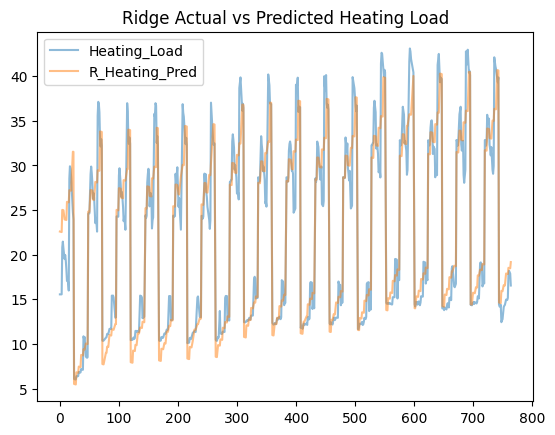

In [106]:
y_train[['Heating_Load', 'R_Heating_Pred']].sort_index().plot(alpha=0.5, title="Ridge Actual vs Predicted Heating Load")

In [107]:
paramsRHeat = pd.Series(modelRHeat.coef_, index=X_train.columns)
paramsRHeat

Relative_Compactness        -66.740592
Surface_Area                 -0.065077
Wall_Area                     0.036698
Roof_Area                    -0.050888
Overall_Height                4.149221
Orientation                  -0.020661
Glazing_Area                 20.246118
Glazing_Area_Distribution     0.204229
dtype: float64

In [108]:
np.random.seed(1)
errRHeat = np.std([modelRHeat.fit(*resample(X_train, y_train['Heating_Load'])).coef_
              for i in range(1000)], 0)

In [109]:
print(pd.DataFrame({'effect': paramsRHeat.round(0),
                    'error': errRHeat.round(0)}))

                           effect  error
Relative_Compactness        -67.0    7.0
Surface_Area                 -0.0    0.0
Wall_Area                     0.0    0.0
Roof_Area                    -0.0    0.0
Overall_Height                4.0    0.0
Orientation                  -0.0    0.0
Glazing_Area                 20.0    1.0
Glazing_Area_Distribution     0.0    0.0


{Summarize}

### Task 2.2.2

Ridge Cooling

In [157]:
param_grid = {'alpha': [1, 0.1, 0.01, 0.001, 0.0001, 0.00001]}
grid = GridSearchCV(Ridge(), param_grid, cv=7)
grid.fit(X_train, y_train['Cooling_Load'])
grid.best_params_

{'alpha': 0.001}

In [158]:
modelRCool = Ridge(alpha=grid.best_params_['alpha'])
modelRCool.fit(X_train, y_train['Cooling_Load'])
y_train['R_Cooling_Pred'] = modelRCool.predict(X_train)
y_test['R_Cooling_Pred'] = modelRCool.predict(X_test)

print("")
print("Ridge cooling intercept:")
print(modelRCool.intercept_)
print("Ridge cooling coefficients:")
print(modelRCool.coef_)


Ridge cooling intercept:
96.48548770986395
Ridge cooling coefficients:
[-7.13767085e+01 -6.51703572e-02  2.07462305e-02 -4.29591941e-02
  4.44628175e+00  1.15266507e-01  1.50961863e+01  5.55912128e-02]


<Axes: title={'center': 'Ridge Actual vs Predicted Cooling Load'}>

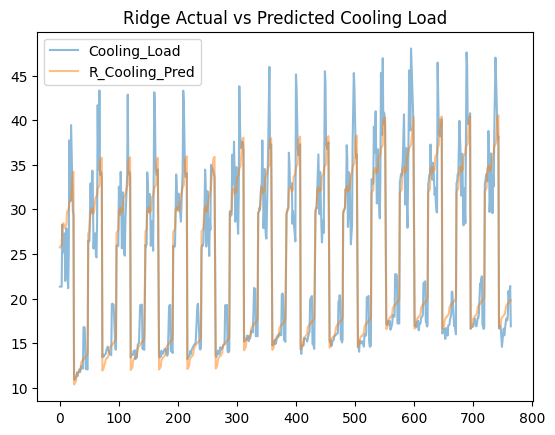

In [112]:
y_train[['Cooling_Load', 'R_Cooling_Pred']].sort_index().plot(alpha=0.5, title="Ridge Actual vs Predicted Cooling Load")

In [113]:
paramsRCool = pd.Series(modelRCool.coef_, index=X_train.columns)
paramsRCool

Relative_Compactness        -71.376708
Surface_Area                 -0.065170
Wall_Area                     0.020746
Roof_Area                    -0.042959
Overall_Height                4.446282
Orientation                   0.115267
Glazing_Area                 15.096186
Glazing_Area_Distribution     0.055591
dtype: float64

In [114]:
np.random.seed(1)
errRCool = np.std([modelRCool.fit(*resample(X_train, y_train['Cooling_Load'])).coef_
              for i in range(1000)], 0)

In [115]:
print(pd.DataFrame({'effect': paramsRCool.round(0),
                    'error': errRCool.round(0)}))

                           effect  error
Relative_Compactness        -71.0    8.0
Surface_Area                 -0.0    0.0
Wall_Area                     0.0    0.0
Roof_Area                    -0.0    0.0
Overall_Height                4.0    0.0
Orientation                   0.0    0.0
Glazing_Area                 15.0    1.0
Glazing_Area_Distribution     0.0    0.0


{Summarize}

### Task 2.3.1

Lasso Heating

In [116]:
param_grid = {'alpha': [1, 0.1]}
grid = GridSearchCV(Lasso(), param_grid, cv=7)
grid.fit(X_train, y_train['Heating_Load'])
grid.best_params_

{'alpha': 0.1}

With the value of 0.001 included, the result did not converge. Using 0.01 worked but later steps had convergence errors.

In [117]:
modelLHeat = Lasso(alpha=grid.best_params_['alpha'])
modelLHeat.fit(X_train, y_train['Heating_Load'])
y_train['L_Heating_Pred'] = modelLHeat.predict(X_train)
y_test['L_Heating_Pred'] = modelLHeat.predict(X_test)

print("")
print("Lasso heating intercept:")
print(modelLHeat.intercept_)
print("Lasso heating coefficients:")
print(modelLHeat.coef_)


Lasso heating intercept:
-26.48249713602111
Lasso heating coefficients:
[-0.00000000e+00  4.96633944e-03  4.73190985e-02 -0.00000000e+00
  4.98997459e+00 -0.00000000e+00  1.44716271e+01  2.79426489e-01]


<Axes: title={'center': 'Lasso Actual vs Predicted Heating Load'}>

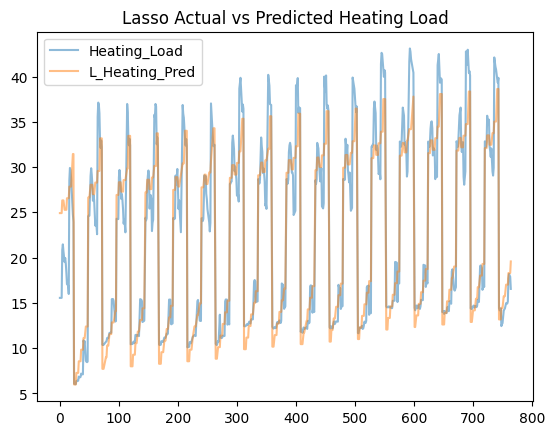

In [118]:
y_train[['Heating_Load', 'L_Heating_Pred']].sort_index().plot(alpha=0.5, title="Lasso Actual vs Predicted Heating Load")

In [119]:
paramsLHeat = pd.Series(modelLHeat.coef_, index=X_train.columns)
paramsLHeat

Relative_Compactness         -0.000000
Surface_Area                  0.004966
Wall_Area                     0.047319
Roof_Area                    -0.000000
Overall_Height                4.989975
Orientation                  -0.000000
Glazing_Area                 14.471627
Glazing_Area_Distribution     0.279426
dtype: float64

In [120]:
np.random.seed(1)
errLHeat = np.std([modelLHeat.fit(*resample(X_train, y_train['Heating_Load'])).coef_
              for i in range(1000)], 0)

In [121]:
print(pd.DataFrame({'effect': paramsLHeat.round(0),
                    'error': errLHeat.round(0)}))

                           effect  error
Relative_Compactness         -0.0    0.0
Surface_Area                  0.0    0.0
Wall_Area                     0.0    0.0
Roof_Area                    -0.0    0.0
Overall_Height                5.0    0.0
Orientation                  -0.0    0.0
Glazing_Area                 14.0    1.0
Glazing_Area_Distribution     0.0    0.0


{Summarize}

### Task 2.3.2

Lasso Cooling

In [159]:
param_grid = {'alpha': [1, 0.1]}
grid = GridSearchCV(Lasso(), param_grid, cv=7)
grid.fit(X_train, y_train['Cooling_Load'])
grid.best_params_

{'alpha': 0.1}

In [160]:
modelLCool = Lasso(alpha=grid.best_params_['alpha'])
modelLCool.fit(X_train, y_train['Cooling_Load'])
y_train['L_Cooling_Pred'] = modelLCool.predict(X_train)
y_test['L_Cooling_Pred'] = modelLCool.predict(X_test)

print("")
print("Lasso cooling intercept:")
print(modelLCool.intercept_)
print("Lasso cooling coefficients:")
print(modelLCool.coef_)


Lasso cooling intercept:
-25.410809931200188
Lasso cooling coefficients:
[-0.          0.01613122  0.02576576 -0.          5.38188424  0.04955085
  9.32690516  0.13041771]


<Axes: title={'center': 'Lasso Actual vs Predicted Cooling Load'}>

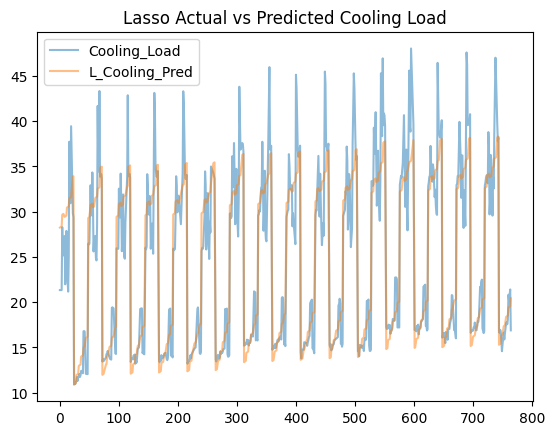

In [124]:
y_train[['Cooling_Load', 'L_Cooling_Pred']].sort_index().plot(alpha=0.5, title="Lasso Actual vs Predicted Cooling Load")

In [125]:
paramsLCool = pd.Series(modelLCool.coef_, index=X_train.columns)
paramsLCool

Relative_Compactness        -0.000000
Surface_Area                 0.016131
Wall_Area                    0.025766
Roof_Area                   -0.000000
Overall_Height               5.381884
Orientation                  0.049551
Glazing_Area                 9.326905
Glazing_Area_Distribution    0.130418
dtype: float64

In [126]:
np.random.seed(1)
errLCool = np.std([modelLCool.fit(*resample(X_train, y_train['Cooling_Load'])).coef_
              for i in range(1000)], 0)

In [127]:
print(pd.DataFrame({'effect': paramsLCool.round(0),
                    'error': errLCool.round(0)}))

                           effect  error
Relative_Compactness         -0.0    0.0
Surface_Area                  0.0    0.0
Wall_Area                     0.0    0.0
Roof_Area                    -0.0    0.0
Overall_Height                5.0    0.0
Orientation                   0.0    0.0
Glazing_Area                  9.0    1.0
Glazing_Area_Distribution     0.0    0.0


{Summarize}

### Task 2.4.1

Elastic Net Heating

In [161]:
param_grid = {'alpha': [1, 0.1]}
grid = GridSearchCV(ElasticNet(), param_grid, cv=7)
grid.fit(X_train, y_train['Heating_Load'])
grid.best_params_

{'alpha': 0.1}

In [162]:
modelENHeat = ElasticNet(alpha=grid.best_params_['alpha'], random_state=65)
modelENHeat.fit(X_train, y_train['Heating_Load'])
y_train['EN_Heating_Pred'] = modelENHeat.predict(X_train)
y_test['EN_Heating_Pred'] = modelENHeat.predict(X_test)

print("")
print("Elastic Net heating intercept:")
print(modelLHeat.intercept_)
print("Elastic Net heating coefficients:")
print(modelLHeat.coef_)


Elastic Net heating intercept:
-26.961154755654604
Elastic Net heating coefficients:
[-0.00000000e+00  8.94092109e-03  4.48575435e-02 -7.46251489e-03
  4.94617189e+00 -4.33822678e-02  1.63010167e+01  2.20869612e-01]


<Axes: title={'center': 'Elastic Net Actual vs Predicted Heating Load'}>

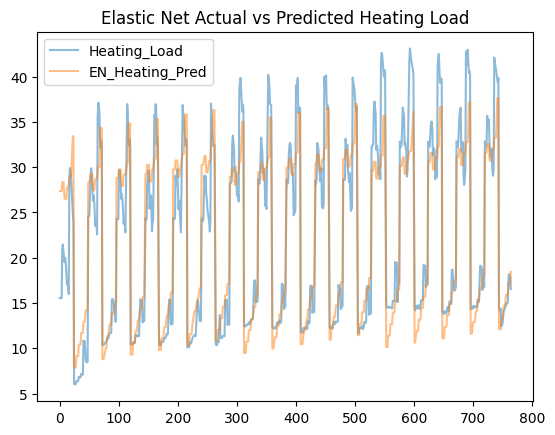

In [130]:
y_train[['Heating_Load', 'EN_Heating_Pred']].sort_index().plot(alpha=0.5, title="Elastic Net Actual vs Predicted Heating Load")

In [131]:
paramsENHeat = pd.Series(modelENHeat.coef_, index=X_train.columns)
paramsENHeat

Relative_Compactness        -0.000000
Surface_Area                -0.006056
Wall_Area                    0.057786
Roof_Area                   -0.011224
Overall_Height               4.104711
Orientation                 -0.000000
Glazing_Area                 4.406504
Glazing_Area_Distribution    0.492566
dtype: float64

In [132]:
np.random.seed(1)
errENHeat = np.std([modelENHeat.fit(*resample(X_train, y_train['Heating_Load'])).coef_
              for i in range(1000)], 0)

In [133]:
print(pd.DataFrame({'effect': paramsENHeat.round(0),
                    'error': errENHeat.round(0)}))

                           effect  error
Relative_Compactness         -0.0    0.0
Surface_Area                 -0.0    0.0
Wall_Area                     0.0    0.0
Roof_Area                    -0.0    0.0
Overall_Height                4.0    0.0
Orientation                  -0.0    0.0
Glazing_Area                  4.0    0.0
Glazing_Area_Distribution     0.0    0.0


{Summarize}

### Task 2.4.2

Elastic Net Cooling

In [163]:
param_grid = {'alpha': [1, 0.1]}
grid = GridSearchCV(ElasticNet(), param_grid, cv=7)
grid.fit(X_train, y_train['Cooling_Load'])
grid.best_params_

{'alpha': 0.1}

In [164]:
modelENCool = ElasticNet(alpha=grid.best_params_['alpha'], random_state=65)
modelENCool.fit(X_train, y_train['Cooling_Load'])
y_train['EN_Cooling_Pred'] = modelENHeat.predict(X_train)
y_test['EN_Cooling_Pred'] = modelENHeat.predict(X_test)

print("")
print("Elastic Net cooling intercept:")
print(modelLCool.intercept_)
print("Elastic Net cooling coefficients:")
print(modelLCool.coef_)


Elastic Net cooling intercept:
-25.410809931200188
Elastic Net cooling coefficients:
[-0.          0.01613122  0.02576576 -0.          5.38188424  0.04955085
  9.32690516  0.13041771]


<Axes: title={'center': 'Elastic Net Actual vs Predicted Cooling Load'}>

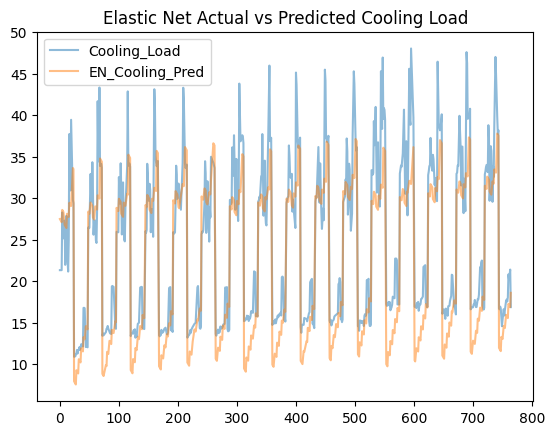

In [136]:
y_train[['Cooling_Load', 'EN_Cooling_Pred']].sort_index().plot(alpha=0.5, title="Elastic Net Actual vs Predicted Cooling Load")

In [137]:
paramsENCool = pd.Series(modelENCool.coef_, index=X_train.columns)
paramsENCool

Relative_Compactness        -0.000000
Surface_Area                -0.000000
Wall_Area                    0.041551
Roof_Area                   -0.004378
Overall_Height               4.404607
Orientation                  0.086316
Glazing_Area                 3.101857
Glazing_Area_Distribution    0.268356
dtype: float64

In [138]:
np.random.seed(1)
errENCool = np.std([modelENCool.fit(*resample(X_train, y_train['Cooling_Load'])).coef_
              for i in range(1000)], 0)

In [139]:
print(pd.DataFrame({'effect': paramsENCool.round(0),
                    'error': errENCool.round(0)}))

                           effect  error
Relative_Compactness         -0.0    0.0
Surface_Area                 -0.0    0.0
Wall_Area                     0.0    0.0
Roof_Area                    -0.0    0.0
Overall_Height                4.0    0.0
Orientation                   0.0    0.0
Glazing_Area                  3.0    0.0
Glazing_Area_Distribution     0.0    0.0


{Summarize}

### Task 2.5.1

Random Forest Regression Heating

In [165]:
param_grid = {'n_estimators': [1, 10, 50, 100, 200]}
grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=7)
grid.fit(X_train, y_train['Heating_Load'])
grid.best_params_

{'n_estimators': 200}

In [166]:
modelRFRHeat = RandomForestRegressor(grid.best_params_['n_estimators'])
modelRFRHeat.fit(X_train, y_train['Heating_Load'])
y_train['RFR_Heating_Pred'] = modelRFRHeat.predict(X_train)
y_test['RFR_Heating_Pred'] = modelRFRHeat.predict(X_test)
# No intercept or coefficients

<Axes: title={'center': 'Random Forest Regression Actual vs Predicted Heating Load'}>

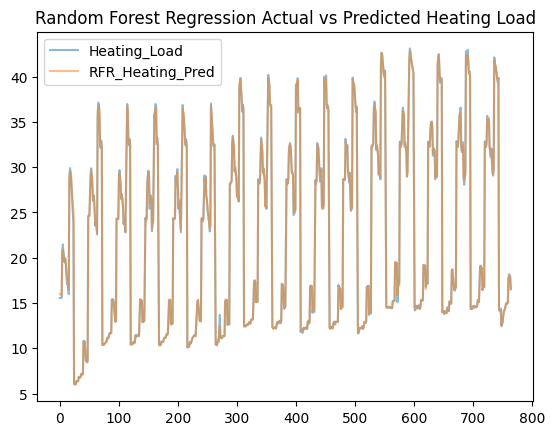

In [142]:
y_train[['Heating_Load', 'RFR_Heating_Pred']].sort_index().plot(alpha=0.5, title="Random Forest Regression Actual vs Predicted Heating Load")

### Task 2.5.2

Random Forest Regression Cooling

In [167]:
param_grid = {'n_estimators': [1, 10, 50, 100, 200]}
grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=7)
grid.fit(X_train, y_train['Cooling_Load'])
grid.best_params_

{'n_estimators': 100}

In [168]:
modelRFRCool = RandomForestRegressor(grid.best_params_['n_estimators'])
modelRFRCool.fit(X_train, y_train['Cooling_Load'])
y_train['RFR_Cooling_Pred'] = modelRFRCool.predict(X_train)
y_test['RFR_Cooling_Pred'] = modelRFRCool.predict(X_test)
# No intercept or coefficients

<Axes: title={'center': 'Random Forest Regression Actual vs Predicted Cooling Load'}>

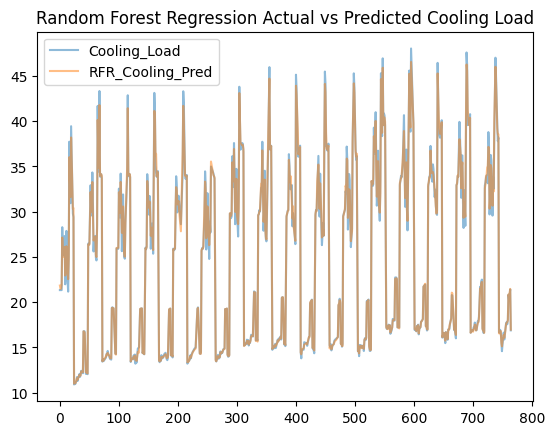

In [145]:
y_train[['Cooling_Load', 'RFR_Cooling_Pred']].sort_index().plot(alpha=0.5, title="Random Forest Regression Actual vs Predicted Cooling Load")

## Task 3

Model Evaluations

### Task 3.1

Evaluate models using RMSE, MAE, and R² score

In [174]:
meh = pd.DataFrame(np.array([[mean_squared_error(y_train['Heating_Load'],  y_train['LR_Heating_Pred']),mean_squared_error(y_train['Heating_Load'],  y_train['R_Heating_Pred']),mean_squared_error(y_train['Heating_Load'],  y_train['L_Heating_Pred']), mean_squared_error(y_train['Heating_Load'],  y_train['EN_Heating_Pred']), mean_squared_error(y_train['Heating_Load'],  y_train['RFR_Heating_Pred']) ]
                             ,[root_mean_squared_error(y_train['Heating_Load'],  y_train['LR_Heating_Pred']),root_mean_squared_error(y_train['Heating_Load'],  y_train['R_Heating_Pred']),root_mean_squared_error(y_train['Heating_Load'],  y_train['L_Heating_Pred']),root_mean_squared_error(y_train['Heating_Load'],  y_train['EN_Heating_Pred']),root_mean_squared_error(y_train['Heating_Load'],  y_train['RFR_Heating_Pred'])] 
                             ,[mean_absolute_error(y_train['Heating_Load'],  y_train['LR_Heating_Pred']),mean_absolute_error(y_train['Heating_Load'],  y_train['R_Heating_Pred']),mean_absolute_error(y_train['Heating_Load'],  y_train['L_Heating_Pred']),mean_absolute_error(y_train['Heating_Load'],  y_train['EN_Heating_Pred']),mean_absolute_error(y_train['Heating_Load'],  y_train['RFR_Heating_Pred'])] 
                             ,[r2_score(y_train['Heating_Load'],  y_train['LR_Heating_Pred']),r2_score(y_train['Heating_Load'],  y_train['R_Heating_Pred']),r2_score(y_train['Heating_Load'],  y_train['L_Heating_Pred']),r2_score(y_train['Heating_Load'],  y_train['EN_Heating_Pred']),r2_score(y_train['Heating_Load'],  y_train['RFR_Heating_Pred'])]
                               ])
                             , columns=["Lin Reg","Ridge","Lasso", "Elastic Net", "Random Forest Regressor"]
                             , index=["MSE","RMSE","MAE","R2"])

mec = pd.DataFrame(np.array([[mean_squared_error(y_train['Cooling_Load'],  y_train['LR_Cooling_Pred']),mean_squared_error(y_train['Cooling_Load'],  y_train['R_Cooling_Pred']),mean_squared_error(y_train['Cooling_Load'],  y_train['L_Cooling_Pred']),mean_squared_error(y_train['Cooling_Load'],  y_train['EN_Cooling_Pred']),mean_squared_error(y_train['Cooling_Load'],  y_train['RFR_Cooling_Pred']) ]
                             ,[root_mean_squared_error(y_train['Cooling_Load'],  y_train['LR_Cooling_Pred']),root_mean_squared_error(y_train['Cooling_Load'],  y_train['R_Cooling_Pred']),root_mean_squared_error(y_train['Cooling_Load'],  y_train['L_Cooling_Pred']),root_mean_squared_error(y_train['Cooling_Load'],  y_train['EN_Cooling_Pred']),root_mean_squared_error(y_train['Cooling_Load'],  y_train['RFR_Cooling_Pred'])] 
                             ,[mean_absolute_error(y_train['Cooling_Load'],  y_train['LR_Cooling_Pred']),mean_absolute_error(y_train['Cooling_Load'],  y_train['R_Cooling_Pred']),mean_absolute_error(y_train['Cooling_Load'],  y_train['L_Cooling_Pred']),mean_absolute_error(y_train['Cooling_Load'],  y_train['EN_Cooling_Pred']),mean_absolute_error(y_train['Cooling_Load'],  y_train['RFR_Cooling_Pred'])] 
                             ,[r2_score(y_train['Cooling_Load'],  y_train['LR_Cooling_Pred']),r2_score(y_train['Cooling_Load'],  y_train['R_Cooling_Pred']),r2_score(y_train['Cooling_Load'],  y_train['L_Cooling_Pred']),r2_score(y_train['Cooling_Load'],  y_train['EN_Cooling_Pred']),r2_score(y_train['Cooling_Load'],  y_train['RFR_Cooling_Pred'])]
                               ])
                             , columns=["Lin Reg","Ridge","Lasso", "Elastic Net", "Random Forest Regressor"]
                             , index=["MSE","RMSE","MAE","R2"])
print("")
print("Performance of model with training data")
print("The Heating data:")
print(meh)
print("")
print("The Cooling data:")
print(mec)


Performance of model with training data
The Heating data:
       Lin Reg     Ridge     Lasso  Elastic Net  Random Forest Regressor
MSE   8.045089  7.946340  9.060286    13.064293                 0.031529
RMSE  2.836387  2.818925  3.010031     3.614456                 0.177565
MAE   2.019194  1.991271  2.155065     2.659659                 0.117113
R2    0.920289  0.921268  0.910231     0.870559                 0.999688

The Cooling data:
       Lin Reg     Ridge      Lasso  Elastic Net  Random Forest Regressor
MSE   9.939724  9.931788  11.123164    18.930985                 0.373874
RMSE  3.152733  3.151474   3.335141     4.350975                 0.611452
MAE   2.198225  2.209375   2.391760     3.396784                 0.380178
R2    0.890300  0.890388   0.877239     0.791068                 0.995874


### Task 3.2

Assess performance on training and testing datasets.

In [177]:
meh_test = pd.DataFrame(np.array([[mean_squared_error(y_test['Heating_Load'],  y_test['LR_Heating_Pred']),mean_squared_error(y_test['Heating_Load'],  y_test['R_Heating_Pred']),mean_squared_error(y_test['Heating_Load'],  y_test['L_Heating_Pred']), mean_squared_error(y_test['Heating_Load'],  y_test['EN_Heating_Pred']), mean_squared_error(y_test['Heating_Load'],  y_test['RFR_Heating_Pred']) ]
                             ,[root_mean_squared_error(y_test['Heating_Load'],  y_test['LR_Heating_Pred']),root_mean_squared_error(y_test['Heating_Load'],  y_test['R_Heating_Pred']),root_mean_squared_error(y_test['Heating_Load'],  y_test['L_Heating_Pred']),root_mean_squared_error(y_test['Heating_Load'],  y_test['EN_Heating_Pred']),root_mean_squared_error(y_test['Heating_Load'],  y_test['RFR_Heating_Pred'])] 
                             ,[mean_absolute_error(y_test['Heating_Load'],  y_test['LR_Heating_Pred']),mean_absolute_error(y_test['Heating_Load'],  y_test['R_Heating_Pred']),mean_absolute_error(y_test['Heating_Load'],  y_test['L_Heating_Pred']),mean_absolute_error(y_test['Heating_Load'],  y_test['EN_Heating_Pred']),mean_absolute_error(y_test['Heating_Load'],  y_test['RFR_Heating_Pred'])] 
                             ,[r2_score(y_test['Heating_Load'],  y_test['LR_Heating_Pred']),r2_score(y_test['Heating_Load'],  y_test['R_Heating_Pred']),r2_score(y_test['Heating_Load'],  y_test['L_Heating_Pred']),r2_score(y_test['Heating_Load'],  y_test['EN_Heating_Pred']),r2_score(y_test['Heating_Load'],  y_test['RFR_Heating_Pred'])]
                               ])
                             , columns=["Lin Reg","Ridge","Lasso", "Elastic Net", "Random Forest Regressor"]
                             , index=["MSE","RMSE","MAE","R2"])

mec_test = pd.DataFrame(np.array([[mean_squared_error(y_test['Cooling_Load'],  y_test['LR_Cooling_Pred']),mean_squared_error(y_test['Cooling_Load'],  y_test['R_Cooling_Pred']),mean_squared_error(y_test['Cooling_Load'],  y_test['L_Cooling_Pred']),mean_squared_error(y_test['Cooling_Load'],  y_test['EN_Cooling_Pred']),mean_squared_error(y_test['Cooling_Load'],  y_test['RFR_Cooling_Pred']) ]
                             ,[root_mean_squared_error(y_test['Cooling_Load'],  y_test['LR_Cooling_Pred']),root_mean_squared_error(y_test['Cooling_Load'],  y_test['R_Cooling_Pred']),root_mean_squared_error(y_test['Cooling_Load'],  y_test['L_Cooling_Pred']),root_mean_squared_error(y_test['Cooling_Load'],  y_test['EN_Cooling_Pred']),root_mean_squared_error(y_test['Cooling_Load'],  y_test['RFR_Cooling_Pred'])] 
                             ,[mean_absolute_error(y_test['Cooling_Load'],  y_test['LR_Cooling_Pred']),mean_absolute_error(y_test['Cooling_Load'],  y_test['R_Cooling_Pred']),mean_absolute_error(y_test['Cooling_Load'],  y_test['L_Cooling_Pred']),mean_absolute_error(y_test['Cooling_Load'],  y_test['EN_Cooling_Pred']),mean_absolute_error(y_test['Cooling_Load'],  y_test['RFR_Cooling_Pred'])] 
                             ,[r2_score(y_test['Cooling_Load'],  y_test['LR_Cooling_Pred']),r2_score(y_test['Cooling_Load'],  y_test['R_Cooling_Pred']),r2_score(y_test['Cooling_Load'],  y_test['L_Cooling_Pred']),r2_score(y_test['Cooling_Load'],  y_test['EN_Cooling_Pred']),r2_score(y_test['Cooling_Load'],  y_test['RFR_Cooling_Pred'])]
                               ])
                             , columns=["Lin Reg","Ridge","Lasso", "Elastic Net", "Random Forest Regressor"]
                             , index=["MSE","RMSE","MAE","R2"])
print("Performance of model with test data")
print("")
print("The Heating data:")
print(meh_test)
print("")
print("The delta between using training and test data")
print(meh - meh_test)
print("")
print("The Cooling data:")
print(mec_test)
print("")
print("The delta between using training and test data")
print(mec - mec_test)


Performance of model with test data

The Heating data:
        Lin Reg      Ridge      Lasso  Elastic Net  Random Forest Regressor
MSE   11.075499  10.836508  11.355348    14.650100                 0.213841
RMSE   3.327987   3.291885   3.369770     3.827545                 0.462429
MAE    2.482320   2.404288   2.543646     2.915634                 0.327338
R2     0.894188   0.896472   0.891515     0.860038                 0.997957

The delta between using training and test data
       Lin Reg     Ridge     Lasso  Elastic Net  Random Forest Regressor
MSE  -3.030410 -2.890168 -2.295061    -1.585807                -0.182311
RMSE -0.491601 -0.472960 -0.359739    -0.213089                -0.284864
MAE  -0.463126 -0.413018 -0.388581    -0.255976                -0.210225
R2    0.026101  0.024796  0.018716     0.010521                 0.001731

The Cooling data:
        Lin Reg      Ridge      Lasso  Elastic Net  Random Forest Regressor
MSE   11.182752  11.049192  11.493701    17.818479       

Reviewing the data above, the deltas between the Training data and the Test data do not seem appreciable. However, the MSE scores seem to have the biggest delta. In addition, the deltas for the Cooling data are smaller than the deltas for the deltas for the Heating data. Therefore, it seems that the Cooling model is high bias while the heating model is high variance.

I did not run a cross validation since that did not seem to be the point of this question.

## Task 4

Target Variable Analysis:
- Develop separate models for Heating Load and Cooling Load as target variables.
- Compare the effectiveness of models for each target.

I performed all of the analysis with heating and cooling separate. It did not make sens to me that I would combine them. So the above analysis covers the effectiveness of the separate models.